# **Q1. Business Case: Delhivery - Feature Engineering**

**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**Dataset**

Dataset Link: [delhivery_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181)

\
**Column Profiling:**

- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
  - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
  - Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different - source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field

**Concept Used:**

- Feature Creation
- Relationship between Features
- Column Normalization /Column Standardization
- Handling categorical values
- Missing values - Outlier treatment / Types of outliers

## **Import the required Libraries & Perform Exploratory Data Analysis.**

### **Accesing file libraries and Summarizing the actual data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#### **Summary of the Dataset**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O delhivery_data.csv

--2024-10-14 14:37:18--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.71, 18.64.229.135, 18.64.229.91, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M   185MB/s    in 0.3s    

2024-10-14 14:37:18 (185 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



In [ ]:
df = pd.read_csv("delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### **1. Basic data cleaning and exploration:**

In [ ]:
data = df.copy()
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# Finding the number of row(s) and column(s) of the dataset
print(f'Shape of the dataset: {data.shape}')
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Shape of the dataset: (144867, 24)
Number of rows: 144867
Number of columns: 24


In [ ]:
# Duplicate record check

data.duplicated().sum()

0

In [ ]:
col_field = data.isna().sum()
col_field

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
col_field[col_field > 0]

,0
source_name,293
destination_name,261


**1. Handle missing values in the data.**

In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# Column (Field wise) - No missing values
data.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [ ]:
# Overall - No missing values
data.isna().sum().sum()

0

**2. Converting time columns into pandas datetime.**

In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
time_column_index_arr = data.columns[data.columns.map(lambda x: True if x.find('time') > 0 else False)]
time_column_index_arr

Index(['trip_creation_time', 'od_start_time', 'od_end_time',
       'cutoff_timestamp', 'actual_time', 'osrm_time', 'segment_actual_time',
       'segment_osrm_time'],
      dtype='object')

In [ ]:
for i in time_column_index_arr:
  if data[i].dtype == 'object':
    data[i] = data[i].astype('datetime64[ns]')
    print(f'{i} converted to {data[i].dtype}')

trip_creation_time converted to datetime64[ns]
od_start_time converted to datetime64[ns]
od_end_time converted to datetime64[ns]
cutoff_timestamp converted to datetime64[ns]


**3. Analyze structure & characteristics of the dataset.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [ ]:
data.describe(include=['int64', 'float64'])

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


In [ ]:
# Finding the number of row(s) and column(s) of the dataset - After handling missing values
print(f'Shape of the dataset: {data.shape}')
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Shape of the dataset: (144316, 24)
Number of rows: 144316
Number of columns: 24


### **2. Merging the rows and Aggregating & Grouping the fields by segments**

**1. Grouping by segment**

In [ ]:
data["segment_key"] = data["trip_uuid"] + data["source_center"] + data["destination_center"]
data["segment_key"].head()

,segment_key
0,trip-153741093647649320IND388121AAAIND388620AAB
1,trip-153741093647649320IND388121AAAIND388620AAB
2,trip-153741093647649320IND388121AAAIND388620AAB
3,trip-153741093647649320IND388121AAAIND388620AAB
4,trip-153741093647649320IND388121AAAIND388620AAB


In [ ]:
seg_key_grp = data.groupby('segment_key')

data['segment_actual_time_sum'] = seg_key_grp['segment_actual_time'].cumsum()

data['segment_osrm_distance_sum'] = seg_key_grp['segment_osrm_distance'].cumsum()

data['segment_osrm_time_sum'] = seg_key_grp['segment_osrm_time'].cumsum()

data[['segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum']]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


**2. Aggregating at segment level**

a. Create a dictionary named **create_segment_dict**, that defines how to
aggregate and select values.
  - You can keep the first and last values for some
numeric/categorical fields if aggregating them won’t make sense.

In [ ]:
create_segment_dict = {
    "data": "first",
    "trip_creation_time": "first",
    "route_schedule_uuid": "first",
    "route_type": "first",
    "trip_uuid": "first",

    "source_center": "first",
    "source_name": "first",
    "destination_center": "last",
    "destination_name": "last",

    "od_start_time": "first",
    "od_end_time": "last",
    "start_scan_to_end_scan": "last",
    "actual_distance_to_destination": "last",

    "actual_time" : "sum",
    "osrm_time" : "sum",
    "osrm_distance" : "sum",

    "segment_actual_time": "last",
    "segment_osrm_time": "last",
    "segment_osrm_distance": "last",

    "segment_actual_time_sum": "last",
    "segment_osrm_distance_sum": "last",
    "segment_osrm_time_sum": "last"
}
create_segment_dict

{'data': 'first',
 'trip_creation_time': 'first',
 'route_schedule_uuid': 'first',
 'route_type': 'first',
 'trip_uuid': 'first',
 'source_center': 'first',
 'source_name': 'first',
 'destination_center': 'last',
 'destination_name': 'last',
 'od_start_time': 'first',
 'od_end_time': 'last',
 'start_scan_to_end_scan': 'last',
 'actual_distance_to_destination': 'last',
 'actual_time': 'sum',
 'osrm_time': 'sum',
 'osrm_distance': 'sum',
 'segment_actual_time': 'last',
 'segment_osrm_time': 'last',
 'segment_osrm_distance': 'last',
 'segment_actual_time_sum': 'last',
 'segment_osrm_distance_sum': 'last',
 'segment_osrm_time_sum': 'last'}

b. Further group the data by **segment_key** because you want to perform
aggregation operations for different segments of each trip based on the
**segment_key** value.

c. The aggregation functions specified in the **create_segment_dict** are
applied to each group of rows with the same **segment_key**.

d. Sort the resulting DataFrame **segment**, by two criteria:
  - First, it sorts by **segment_key** to ensure that segments are
ordered consistently.
  - Second, it sorts by **od_end_time** in ascending order, ensuring that
segments within the same trip are ordered by their end times
from earliest to latest.

In [ ]:
segment = seg_key_grp.agg(create_segment_dict).reset_index()
segment.sort_values(by=['segment_key', 'od_end_time'], ascending=True).reset_index(drop=True, inplace=True)
segment.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,383.759164,6484.0,3464.0,4540.1261,20.0,10.0,15.0693,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,440.973689,9198.0,4323.0,6037.6386,22.0,3.0,5.3898,820.0,649.8528,474.0
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,24.644021,96.0,55.0,60.3157,15.0,7.0,6.9464,46.0,28.1995,26.0
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,48.542890,303.0,155.0,209.1151,20.0,3.0,3.8074,95.0,55.9899,39.0
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,237.439610,2601.0,1427.0,1975.7409,275.0,28.0,32.8506,608.0,317.7408,231.0


In [ ]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   segment_key                     26222 non-null  object        
 1   data                            26222 non-null  object        
 2   trip_creation_time              26222 non-null  datetime64[ns]
 3   route_schedule_uuid             26222 non-null  object        
 4   route_type                      26222 non-null  object        
 5   trip_uuid                       26222 non-null  object        
 6   source_center                   26222 non-null  object        
 7   source_name                     26222 non-null  object        
 8   destination_center              26222 non-null  object        
 9   destination_name                26222 non-null  object        
 10  od_start_time                   26222 non-null  datetime64[ns]
 11  od

In [ ]:
# Finding the number of row(s) and column(s) of the segmented dataset
print(f'Shape of the dataset: {segment.shape}')
print(f'Number of rows: {segment.shape[0]}')
print(f'Number of columns: {segment.shape[1]}')

Shape of the dataset: (26222, 23)
Number of rows: 26222
Number of columns: 23


In [ ]:
segment.describe(include='float')

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000
mean,298.536687,92.533054,2300.493669,1180.180688,1571.558341,36.929792,11.720616,13.169626,199.095645,125.587130,101.793341
std,441.112141,209.952355,11268.597910,5909.330938,7987.814666,100.004947,21.279410,27.146578,382.150687,286.670106,216.202739
min,20.000000,9.001351,9.000000,6.000000,9.072900,0.000000,0.000000,0.000000,9.000000,9.072900,6.000000
25%,90.000000,21.654149,91.000000,46.000000,56.312950,7.000000,3.000000,3.850150,50.000000,28.429100,25.000000
50%,152.000000,35.044329,181.000000,89.000000,100.486550,17.000000,8.000000,8.483250,83.000000,45.797650,42.000000
75%,307.000000,65.557393,449.000000,219.000000,250.691600,35.000000,15.000000,16.958300,166.000000,91.023575,79.000000
max,7898.000000,1927.447705,167920.000000,76953.000000,102415.868000,3051.000000,1611.000000,2191.403700,4504.000000,2640.924700,1938.000000


### **3. Feature Engineering:**

1. Calculate time taken between **od_start_time** and **od_end_time** and keep it as a feature named **od_time_diff_hour**. Drop the original columns, if required.

In [ ]:
segment['od_time_diff_hour'] = segment['od_end_time'] - segment['od_start_time']
segment[['od_time_diff_hour', 'od_start_time', 'od_end_time']]

,od_time_diff_hour,od_start_time,od_end_time
0,0 days 21:00:36.265275,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744
1,0 days 16:39:30.322728,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469
2,0 days 00:58:49.943264,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855
3,0 days 02:02:46.769161,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591
4,0 days 13:54:38.335721,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454
...,...,...,...
26217,0 days 01:02:06.911603,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797
26218,0 days 01:31:05.267810,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682
26219,0 days 00:44:10.464194,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194
26220,0 days 04:47:28.440393,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940


2. Destination Name: Split and extract features out of destination. City-place-code
(State)
3. Source Name: Split and extract features out of destination. City-place-code
(State)

In [ ]:
segment[['source_name', 'destination_name']]

,source_name,destination_name
0,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana)
1,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh)
2,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka)
3,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka)
4,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab)
...,...,...
26217,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu)
26218,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu)
26219,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu)
26220,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka)


In [ ]:
def splitText(x):
  return x.split('(')[0].split('_')

In [ ]:
source_seg_list = segment['source_name'].apply(splitText)
source_seg_list

,source_name
0,"[Kanpur, Central, H, 6 ]"
1,"[Bhopal, Trnsport, H ]"
2,"[Doddablpur, ChikaDPP, D ]"
3,"[Tumkur, Veersagr, I ]"
4,"[Gurgaon, Bilaspur, HB ]"
...,...
26217,"[Tirchchndr, Shnmgprm, D ]"
26218,"[Peikulam, SriVnktpm, D ]"
26219,"[Eral, Busstand, D ]"
26220,"[Sandur, WrdN1DPP, D ]"


In [ ]:
destination_seg_list = segment['destination_name'].apply(splitText)
destination_seg_list

,destination_name
0,"[Gurgaon, Bilaspur, HB ]"
1,"[Kanpur, Central, H, 6 ]"
2,"[Chikblapur, ShntiSgr, D ]"
3,"[Doddablpur, ChikaDPP, D ]"
4,"[Chandigarh, Mehmdpur, H ]"
...,...
26217,"[Thisayanvilai, UdnkdiRD, D ]"
26218,"[Tirunelveli, VdkkuSrt, I ]"
26219,"[Tirchchndr, Shnmgprm, D ]"
26220,"[Bellary, Dc ]"


In [ ]:
print(source_seg_list.map(lambda x: len(x)).unique())
print(destination_seg_list.map(lambda x: len(x)).unique())

[4 3 1 2]
[3 4 1 2]


In [ ]:
def getCity(x):
  # get city details
  return x[0] if len(x) >= 1 else 'No City'

def getPlace(x):
  # get place details
  # if len(x) >= 2:
  #   return x[1]
  return x[1] if len(x) >= 2 else 'No Place'

def getCode(x):
  # get place details
  # if len(x) >= 3:
  #   return x[2]
  return x[2] if len(x) >= 3 else 'No Code'

def getState(x):
  # get state details
  x = x.split('(')[1]
  return x[:-1] if len(x) > 0 else 'No State'

In [ ]:
segment['source_city'] = source_seg_list.apply(getCity)
segment['source_place'] = source_seg_list.apply(getPlace)
segment['source_code'] = source_seg_list.apply(getCode)
segment['source_state'] = segment['source_name'].apply(getState)

segment['destination_city'] = destination_seg_list.apply(getCity)
segment['destination_place'] = destination_seg_list.apply(getPlace)
segment['destination_code'] = destination_seg_list.apply(getCode)
segment['destination_state'] = segment['destination_name'].apply(getState)

segment[['source_city', 'source_place', 'source_code', 'source_state', 'destination_city', 'destination_place', 'destination_code', 'destination_state']]

,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,Kanpur,Central,H,Uttar Pradesh,Gurgaon,Bilaspur,HB,Haryana
1,Bhopal,Trnsport,H,Madhya Pradesh,Kanpur,Central,H,Uttar Pradesh
2,Doddablpur,ChikaDPP,D,Karnataka,Chikblapur,ShntiSgr,D,Karnataka
3,Tumkur,Veersagr,I,Karnataka,Doddablpur,ChikaDPP,D,Karnataka
4,Gurgaon,Bilaspur,HB,Haryana,Chandigarh,Mehmdpur,H,Punjab
...,...,...,...,...,...,...,...,...
26217,Tirchchndr,Shnmgprm,D,Tamil Nadu,Thisayanvilai,UdnkdiRD,D,Tamil Nadu
26218,Peikulam,SriVnktpm,D,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Tamil Nadu
26219,Eral,Busstand,D,Tamil Nadu,Tirchchndr,Shnmgprm,D,Tamil Nadu
26220,Sandur,WrdN1DPP,D,Karnataka,Bellary,Dc,No Code,Karnataka


In [ ]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   segment_key                     26222 non-null  object         
 1   data                            26222 non-null  object         
 2   trip_creation_time              26222 non-null  datetime64[ns] 
 3   route_schedule_uuid             26222 non-null  object         
 4   route_type                      26222 non-null  object         
 5   trip_uuid                       26222 non-null  object         
 6   source_center                   26222 non-null  object         
 7   source_name                     26222 non-null  object         
 8   destination_center              26222 non-null  object         
 9   destination_name                26222 non-null  object         
 10  od_start_time                   26222 non-null  datetime64

4. Trip_creation_time: Extract features like month, year, day, etc.

In [ ]:
segment['trip_creation_time']

,trip_creation_time
0,2018-09-12 00:00:16.535741
1,2018-09-12 00:00:16.535741
2,2018-09-12 00:00:22.886430
3,2018-09-12 00:00:22.886430
4,2018-09-12 00:00:33.691250
...,...
26217,2018-10-03 23:59:14.390954
26218,2018-10-03 23:59:14.390954
26219,2018-10-03 23:59:14.390954
26220,2018-10-03 23:59:42.701692


In [ ]:
def getHours(x):
  # hour = x.dt.hour
  hour = x.hour
  day_parts = ""
  if 5 <= hour <= 12:
    day_parts = "Morning"
  elif 13 <= hour <= 16:
    day_parts = "Noon"
  elif 17 <= hour <= 20:
    day_parts = "Evening"
  else:
    day_parts = "Night"

  return day_parts

In [ ]:
segment['trip_creation_time_month'] = segment['trip_creation_time'].dt.month_name()
segment['trip_creation_time_year'] = segment['trip_creation_time'].dt.year
segment['trip_creation_time_day'] = segment['trip_creation_time'].dt.day
segment['trip_creation_time_day_name'] = segment['trip_creation_time'].dt.day_name()
segment['trip_creation_time_hours'] = segment['trip_creation_time'].dt.hour
segment['trip_creation_time_hours_seg'] = segment['trip_creation_time'].apply(getHours)
segment[['trip_creation_time_month', 'trip_creation_time_year', 'trip_creation_time_day', 'trip_creation_time_day_name', 'trip_creation_time_hours', 'trip_creation_time_hours_seg']]

,trip_creation_time_month,trip_creation_time_year,trip_creation_time_day,trip_creation_time_day_name,trip_creation_time_hours,trip_creation_time_hours_seg
0,September,2018,12,Wednesday,0,Night
1,September,2018,12,Wednesday,0,Night
2,September,2018,12,Wednesday,0,Night
3,September,2018,12,Wednesday,0,Night
4,September,2018,12,Wednesday,0,Night
...,...,...,...,...,...,...
26217,October,2018,3,Wednesday,23,Night
26218,October,2018,3,Wednesday,23,Night
26219,October,2018,3,Wednesday,23,Night
26220,October,2018,3,Wednesday,23,Night


<Axes: xlabel='trip_creation_time_day_name', ylabel='Count'>

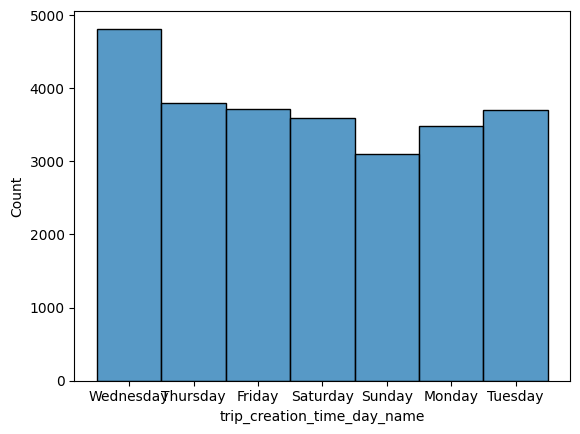

In [ ]:
sns.histplot(segment['trip_creation_time_day_name'])

<Axes: xlabel='trip_creation_time_hours_seg', ylabel='Count'>

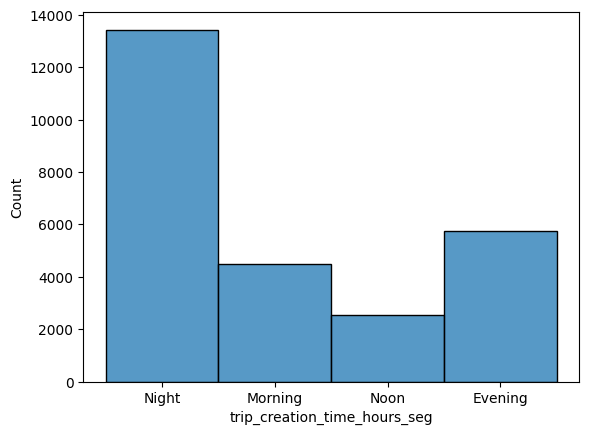

In [ ]:
sns.histplot(segment['trip_creation_time_hours_seg'])

### **4. In-depth analysis:**

**1. Grouping and Aggregating at Trip-level**

  - Groups the **segment** data by the **trip_uuid** column to focus on
aggregating data at the trip level.
  - Apply suitable aggregation functions like **first**, **last**, and **sum** specified in the **create_trip_dict** dictionary to calculate summary statistics for each trip.

In [ ]:
create_trip_dict = create_segment_dict
create_trip_dict.update({
    'osrm_distance' : 'sum',
    'segment_actual_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
    'trip_creation_time_month': 'last',
    'trip_creation_time_year': 'last',
    'trip_creation_time_day': 'last',
    'trip_creation_time_day_name': 'last',
    'trip_creation_time_hours': 'last',
    'trip_creation_time_hours_seg': 'last',
    'source_city': 'first',
    'source_place': 'first',
    'source_code': 'first',
    'source_state': 'first',
    'destination_city': 'last',
    'destination_place': 'last',
    'destination_code': 'last',
    'destination_state': 'last'
});
create_trip_dict

{'data': 'first',
 'trip_creation_time': 'first',
 'route_schedule_uuid': 'first',
 'route_type': 'first',
 'trip_uuid': 'first',
 'source_center': 'first',
 'source_name': 'first',
 'destination_center': 'last',
 'destination_name': 'last',
 'od_start_time': 'first',
 'od_end_time': 'last',
 'start_scan_to_end_scan': 'last',
 'actual_distance_to_destination': 'last',
 'actual_time': 'sum',
 'osrm_time': 'sum',
 'osrm_distance': 'sum',
 'segment_actual_time': 'last',
 'segment_osrm_time': 'last',
 'segment_osrm_distance': 'last',
 'segment_actual_time_sum': 'sum',
 'segment_osrm_distance_sum': 'sum',
 'segment_osrm_time_sum': 'sum',
 'trip_creation_time_month': 'last',
 'trip_creation_time_year': 'last',
 'trip_creation_time_day': 'last',
 'trip_creation_time_day_name': 'last',
 'trip_creation_time_hours': 'last',
 'trip_creation_time_hours_seg': 'last',
 'source_city': 'first',
 'source_place': 'first',
 'source_code': 'first',
 'source_state': 'first',
 'destination_city': 'last',
 '

In [ ]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,trip_creation_time_hours,trip_creation_time_hours_seg,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,0,Night,Kanpur,Central,H,Uttar Pradesh,Kanpur,Central,H,Uttar Pradesh
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,0,Night,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,0,Night,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB,Haryana
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,0,Night,Mumbai Hub,No Place,No Code,Maharashtra,Mumbai,MiraRd,IP,Maharashtra
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,0,Night,Bellary,Dc,No Code,Karnataka,Sandur,WrdN1DPP,D,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,23,Night,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H,Punjab
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,23,Night,FBD,Balabhgarh,DPC,Haryana,Faridabad,Blbgarh,DC,Haryana
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,23,Night,Kanpur,GovndNgr,DC,Uttar Pradesh,Kanpur,GovndNgr,DC,Uttar Pradesh
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,23,Night,Tirunelveli,VdkkuSrt,I,Tamil Nadu,Tirchchndr,Shnmgprm,D,Tamil Nadu


In [ ]:
trip["trip_creation_time_hours"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [ ]:
trip_hour = trip.groupby(by="trip_creation_time_hours")["trip_uuid"].count().to_frame().reset_index()
trip_hour.head()

,trip_creation_time_hours,trip_uuid
0,0,991
1,1,748
2,2,702
3,3,651
4,4,635


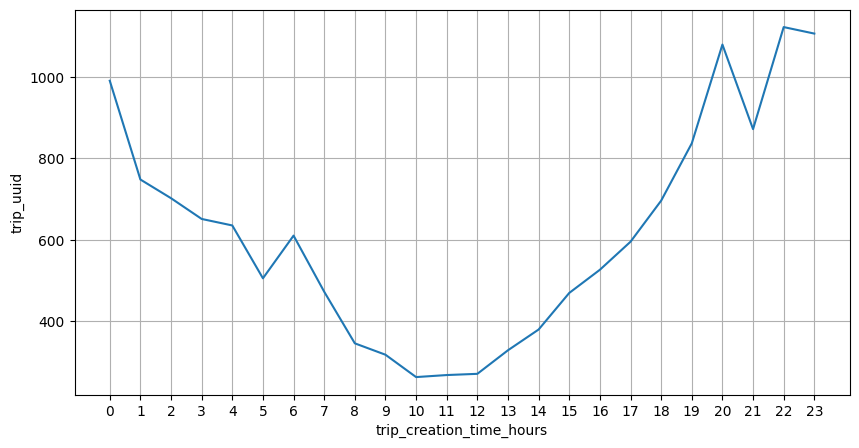

In [ ]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = trip_hour,
x = trip_hour["trip_creation_time_hours"], y = trip_hour["trip_uuid"])
plt.xticks(np.arange(0,24))
plt.grid("both")
plt.show()

***Observation***:
  - Peak booking hours are observed at night, between 10 PM and 12 AM.
  - Low booking activity occurs in the morning, between 10 AM and 12 PM.

In [ ]:
trip["trip_creation_time_hours_seg"].unique()

array(['Night', 'Morning', 'Noon', 'Evening'], dtype=object)

In [ ]:
trip_hours_seg = trip.groupby(by="trip_creation_time_hours_seg")["trip_uuid"].count().to_frame().reset_index()
trip_hours_seg.head()

,trip_creation_time_hours_seg,trip_uuid
0,Evening,3208
1,Morning,3048
2,Night,6829
3,Noon,1702


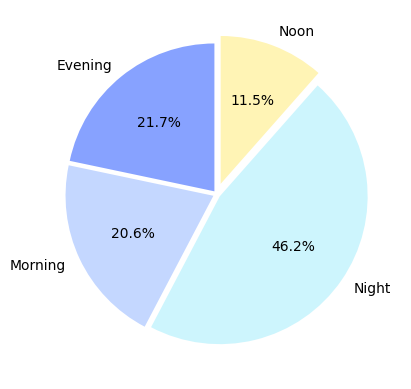

In [ ]:
kwargs = dict(
  startangle = 90,
  colors = ['#87A2FF', '#C4D7FF', '#CDF5FD', '#FFF4B5'],
  autopct = '%1.1f%%',
)

plt.pie(x = trip_hours_seg["trip_uuid"], labels = trip_hours_seg['trip_creation_time_hours_seg'], explode = [0.025,0.025,0.025,0.075], **kwargs)
plt.show()

In [ ]:
trip["trip_creation_time_month"].unique()

array(['September', 'October'], dtype=object)

In [ ]:
trip_hours_month = trip.groupby(by="trip_creation_time_month")["trip_uuid"].count().to_frame().reset_index()
trip_hours_month.head()

,trip_creation_time_month,trip_uuid
0,October,1776
1,September,13011


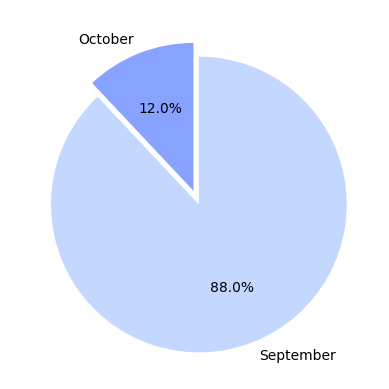

In [ ]:
plt.pie(x = trip_hours_month["trip_uuid"], labels = trip_hours_month['trip_creation_time_month'], explode = [0.025,0.075], **kwargs)
plt.show()

In [ ]:
trip_route = trip.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
trip_route['perc'] = np.round(trip_route['trip_uuid'] * 100/ trip_route['trip_uuid'].sum(), 2)
trip_route.head()

,route_type,trip_uuid,perc
0,Carting,8906,60.23
1,FTL,5881,39.77


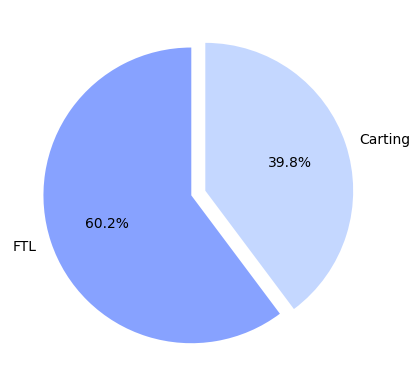

In [ ]:
plt.pie(x = trip_route["trip_uuid"], labels = trip['route_type'].unique(), explode = [0.025,0.075], **kwargs)
plt.show()

In [ ]:
trip_source_state = trip.groupby(by='source_state')['trip_uuid'].count().to_frame().reset_index()
trip_source_state['perc'] = np.round(trip_source_state['trip_uuid'] * 100/ trip_source_state['trip_uuid'].sum(), 2)
trip_source_state = trip_source_state.sort_values(by = 'trip_uuid', ascending = False)
trip_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,2714,18.35
14,Karnataka,2143,14.49
10,Haryana,1823,12.33
24,Tamil Nadu,1039,7.03
25,Telangana,784,5.30


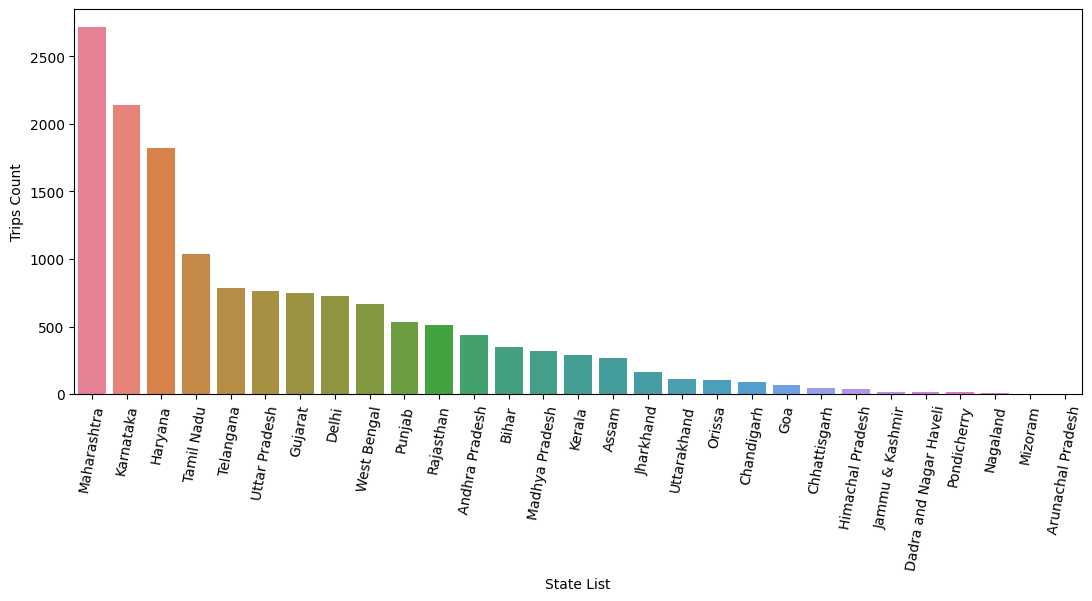

In [ ]:
plt.figure(figsize = (13, 5))
sns.barplot(data = trip_source_state, y = trip_source_state['trip_uuid'], x = trip_source_state['source_state'], hue = trip_source_state['source_state'])
plt.xlabel("State List")
plt.ylabel("Trips Count")
plt.xticks(rotation=80)
plt.show()

***Observation:***
  - **Maharashtra** holds the ***top*** position in bookings.
  - **Karnataka** follows as the ***second-highest*** in bookings.


In [ ]:
trip_destination_state = trip.groupby(by='destination_state')['trip_uuid'].count().to_frame().reset_index()
trip_destination_state['perc'] = np.round(trip_destination_state['trip_uuid'] * 100/ trip_destination_state['trip_uuid'].sum(), 2)
trip_destination_state = trip_destination_state.sort_values(by = 'trip_uuid', ascending = False)
trip_destination_state.head()

,destination_state,trip_uuid,perc
18,Maharashtra,2561,17.32
15,Karnataka,2294,15.51
11,Haryana,1640,11.09
25,Tamil Nadu,1084,7.33
28,Uttar Pradesh,805,5.44


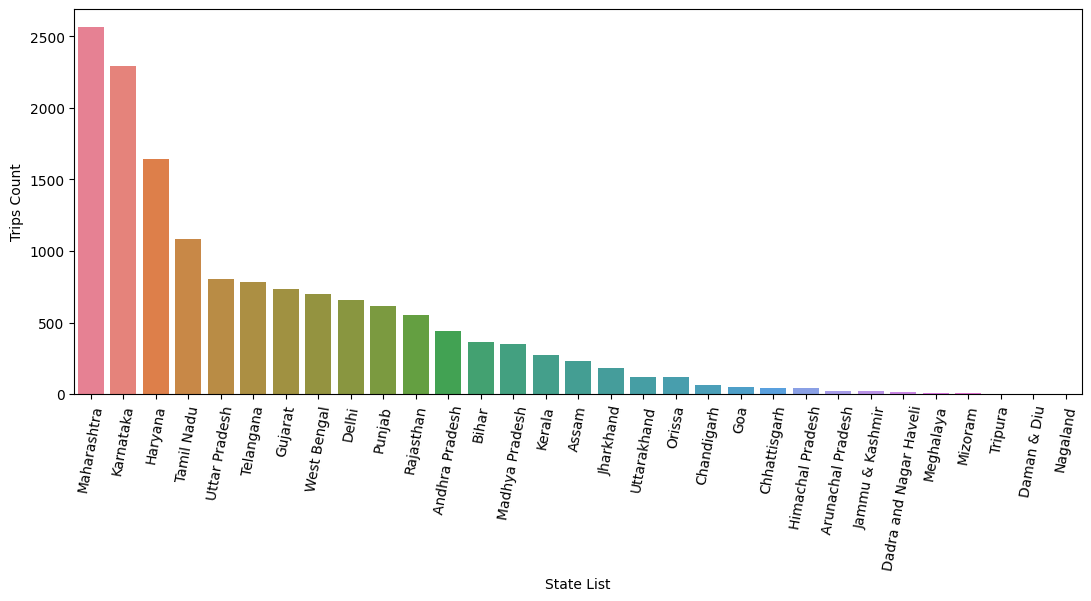

In [ ]:
plt.figure(figsize = (13, 5))
sns.barplot(data = trip_destination_state, y = trip_destination_state['trip_uuid'], x = trip_destination_state['destination_state'], hue = trip_destination_state['destination_state'])
plt.xlabel("State List")
plt.ylabel("Trips Count")
plt.xticks(rotation=80)
plt.show()

***Observation:***

  Observed that top 5 destination points are ***Maharashtra, Karnataka, Haryana, Tamil Nadu*** and ***Uttar Pradesh***

**2. Outlier Detection & Treatment**
  - Find any existing outliers in numerical features.
  - Visualize the outlier values using **Boxplot**.
  - Handle the outliers using the **IQR** method.

In [ ]:
trip.describe(include=['int', 'float'])

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,trip_creation_time_year,trip_creation_time_day,trip_creation_time_hours
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.0,14787.000000,14787.000000
mean,337.436938,104.005219,4079.498546,2092.831406,2786.867034,37.780077,11.263475,12.618605,353.059174,222.705466,180.511598,2018.0,18.375127,12.456212
std,500.374567,242.069053,15231.934085,7964.769556,10769.741065,110.809066,24.523724,32.195955,556.365911,416.846279,314.679279,0.0,7.882198,7.987387
min,20.000000,9.002461,9.000000,6.000000,9.072900,0.000000,0.000000,0.000000,9.000000,9.072900,6.000000,2018.0,1.000000,0.000000
25%,102.000000,20.086307,142.000000,61.000000,65.635550,7.000000,3.000000,3.496300,66.000000,32.578850,30.000000,2018.0,14.000000,4.000000
50%,173.000000,32.852495,346.000000,167.000000,172.886300,16.000000,7.000000,7.803100,147.000000,69.784200,65.000000,2018.0,19.000000,14.000000
75%,339.000000,65.057323,1059.000000,510.500000,603.955400,34.000000,14.000000,15.505550,364.000000,216.560600,184.000000,2018.0,25.000000,20.000000
max,7898.000000,1927.447705,167920.000000,76953.000000,102415.868000,3051.000000,1611.000000,2191.403700,6230.000000,3523.632400,2564.000000,2018.0,30.000000,23.000000


In [ ]:
numerical_features = trip.describe(include=['int', 'float']).columns[:-3]
numerical_features

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_distance_sum', 'segment_osrm_time_sum'],
      dtype='object')

In [ ]:
def detectOutliers(df, i, title):

  Quart1, Quart3 = data[title].quantile([.25, .75])

  df.loc[i, 'title'] = title
  df.loc[i, 'Quartile_1'] = Quart1
  df.loc[i, 'Quartile_3'] = Quart3

  IQR = Quart3 - Quart1
  df.loc[i, 'IQR'] = IQR

  lower_bound = Quart1 - (1.5 * IQR)
  df.loc[i, 'Lower_bound'] = lower_bound

  upper_bound = Quart3 + (1.5 * IQR)
  df.loc[i, 'Upper_bound'] = upper_bound

  return df

In [ ]:
df_outlier = pd.DataFrame()

for i in range(len(numerical_features)):
  detectOutliers(df_outlier, i, numerical_features[i])

df_outlier

,title,Quartile_1,Quartile_3,IQR,Lower_bound,Upper_bound
0,start_scan_to_end_scan,161.000000,1645.000000,1484.000000,-2065.000000,3871.000000
1,actual_distance_to_destination,23.352027,286.919294,263.567267,-371.998873,682.270194
2,actual_time,51.000000,516.000000,465.000000,-646.500000,1213.500000
3,osrm_time,27.000000,259.000000,232.000000,-321.000000,607.000000
4,osrm_distance,29.896250,346.305400,316.409150,-444.717475,820.919125
5,segment_actual_time,20.000000,40.000000,20.000000,-10.000000,70.000000
6,segment_osrm_time,11.000000,22.000000,11.000000,-5.500000,38.500000
7,segment_osrm_distance,12.053975,27.813325,15.759350,-11.585050,51.452350
8,segment_actual_time_sum,51.000000,511.000000,460.000000,-639.000000,1201.000000
9,segment_osrm_distance_sum,30.384175,382.529600,352.145425,-497.833962,910.747737


<Axes: >

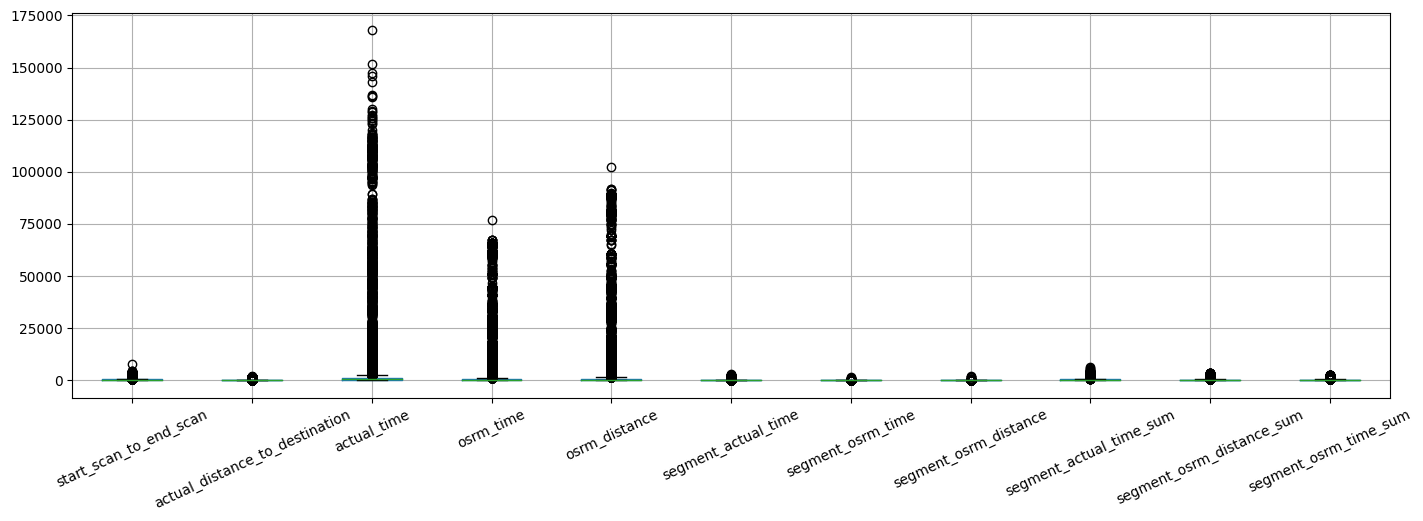

In [ ]:
trip[numerical_features].boxplot(rot=25, figsize=(17,5))

**3. Perform one-hot encoding on categorical features.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Get value counts before one-hot encoding
trip["route_type"].value_counts()

,count
route_type,
Carting,8906
FTL,5881


In [ ]:
# Perform one-hot encoding on categorical column route_type
label_encoder = LabelEncoder()
trip["route_type"] = label_encoder.fit_transform(trip["route_type"])

# Get value counts after one-hot encoding
trip["route_type"].value_counts()

,count
route_type,
0,8906
1,5881


In [ ]:
# Get value counts of categorical variable "data" before one-hot encoding
trip["data"].value_counts()

,count
data,
training,10645
test,4142


In [ ]:
label_encoder = LabelEncoder()
trip["data"] = label_encoder.fit_transform(trip["data"])

# Get value counts after one-hot encoding
trip["data"].value_counts()

,count
data,
1,10645
0,4142


4. Normalize/ Standardize the numerical features using **MinMaxScaler** or **StandardScaler**.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
trip[numerical_features] = MinMaxScaler().fit_transform(trip[numerical_features])
trip[numerical_features].head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0.124270,0.225167,0.093341,0.101122,0.103203,0.007211,0.001862,0.002460,0.247388,0.373134,0.391712
1,0.012947,0.020611,0.002323,0.002651,0.002542,0.006555,0.001862,0.001737,0.021218,0.021373,0.023065
2,0.390835,0.876211,0.668306,0.854640,0.873362,0.027532,0.032278,0.020449,0.530301,0.721625,0.756450
3,0.010155,0.004260,0.000435,0.000234,0.000220,0.011799,0.004345,0.003609,0.008037,0.003074,0.003909
4,0.007616,0.009173,0.003258,0.002612,0.002512,0.009505,0.003104,0.002729,0.053207,0.039185,0.042611


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
trip[numerical_features] = StandardScaler().fit_transform(trip[numerical_features])
trip[numerical_features].head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,1.322180,1.392082,0.761748,0.714944,0.723431,-0.142413,-0.336970,-0.224533,2.147833,2.633597,2.629714
1,-0.430566,-0.229126,-0.241639,-0.236403,-0.233759,-0.160462,-0.336970,-0.273684,-0.381163,-0.332307,-0.367090
2,5.519178,6.551904,7.100159,7.994873,8.046926,0.417127,1.661163,0.999970,5.311326,5.571936,5.594737
3,-0.474534,-0.358711,-0.262451,-0.259757,-0.255838,-0.016065,-0.173857,-0.146281,-0.528553,-0.486596,-0.522809
4,-0.514506,-0.319774,-0.231331,-0.236780,-0.234050,-0.079239,-0.255413,-0.206185,-0.023473,-0.182120,-0.208192


### **5. Hypothesis Testing:**

1. Perform hypothesis testing / visual analysis between :
  - actual_time aggregated value and OSRM time aggregated value.
  - actual_time aggregated value and segment actual time aggregated
value.
  - OSRM distance aggregated value and segment OSRM distance
aggregated value.
  - OSRM time aggregated value and segment OSRM time aggregated
value.

In [ ]:
# Aggregated values based on trip_uuid

aggregated_data = trip.groupby("trip_uuid").agg({"actual_time" : "sum", "osrm_time" : "sum"}).reset_index()
aggregated_data

,trip_uuid,actual_time,osrm_time
0,trip-153671041653548748,0.761748,0.714944
1,trip-153671042288605164,-0.241639,-0.236403
2,trip-153671043369099517,7.100159,7.994873
3,trip-153671046011330457,-0.262451,-0.259757
4,trip-153671052974046625,-0.231331,-0.236780
...,...,...,...
14782,trip-153861095625827784,-0.255623,-0.244188
14783,trip-153861104386292051,-0.265668,-0.260384
14784,trip-153861106442901555,-0.231791,-0.245945
14785,trip-153861115439069069,-0.228442,-0.206771


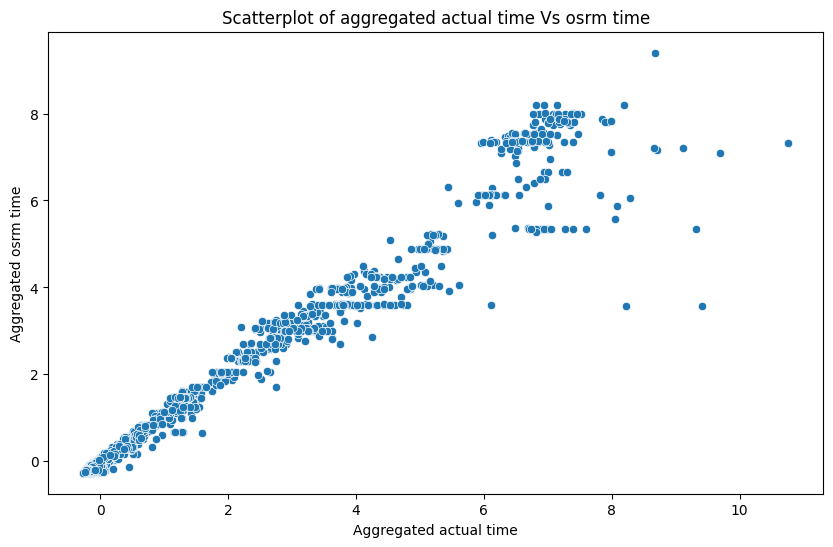

In [ ]:
# plot the distribution of aggregated values
plt.figure(figsize=(10, 6))
sns.scatterplot(x="actual_time", y="osrm_time", data=aggregated_data)
plt.title("Scatterplot of aggregated actual time Vs osrm time")
plt.xlabel("Aggregated actual time")
plt.ylabel("Aggregated osrm time")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# H0: mean of actual_time is not higher than mean of osrm_time
# Ha: "mean of actual_time higher than mean of osrm_time"
sample_1 = trip["actual_time"]
sample_2 = trip["osrm_time"]
t_stat, p_value = ttest_ind(sample_1, sample_2, alternative="greater")

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis")
else:
  print("Failed to reject null hypothesis")

t-statistic: 9.915890579203317e-16
p-value: 0.4999999999999996
Failed to reject null hypothesis


In [ ]:
# Aggregating values based on trip_uuid
aggregated_data = trip.groupby("trip_uuid").agg({"actual_time" : "sum","segment_actual_time_sum" : "sum"}).reset_index()

aggregated_data

,trip_uuid,actual_time,segment_actual_time_sum
0,trip-153671041653548748,0.761748,2.147833
1,trip-153671042288605164,-0.241639,-0.381163
2,trip-153671043369099517,7.100159,5.311326
3,trip-153671046011330457,-0.262451,-0.528553
4,trip-153671052974046625,-0.231331,-0.023473
...,...,...,...
14782,trip-153861095625827784,-0.255623,-0.487212
14783,trip-153861104386292051,-0.265668,-0.596856
14784,trip-153861106442901555,-0.231791,-0.129522
14785,trip-153861115439069069,-0.228442,-0.170863


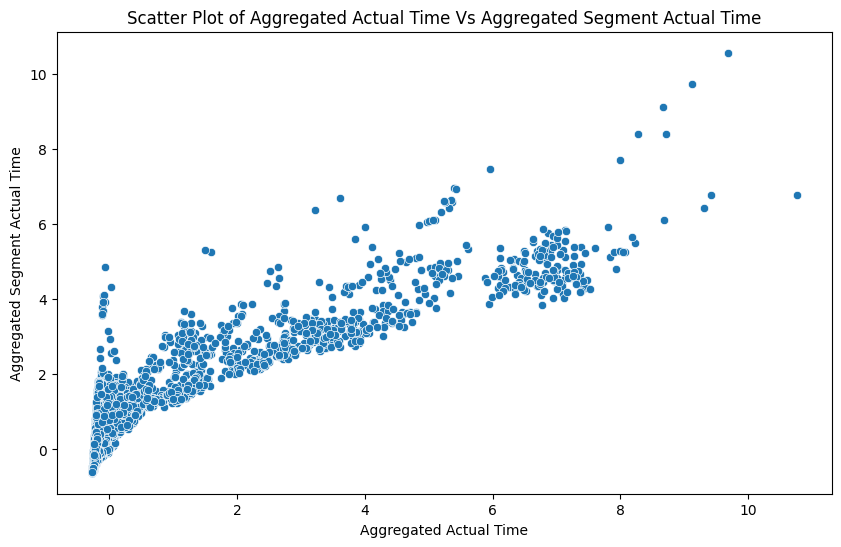

In [ ]:
# Plot the distribution of aggregated values
plt.figure(figsize=(10, 6))
sns.scatterplot(x="actual_time", y="segment_actual_time_sum", data=aggregated_data)
plt.title("Scatter Plot of Aggregated Actual Time Vs Aggregated Segment Actual Time")
plt.xlabel("Aggregated Actual Time")
plt.ylabel("Aggregated Segment Actual Time")
plt.show()

In [ ]:
from scipy.stats import ttest_ind
# H0: mean of actual_time is similar as segment_actual_time_sum
# Ha: mean of actual_time is different than mean of segment_actual_time_sum
sample_1 = trip['actual_time']
sample_2 = trip['segment_actual_time_sum']
t_stat, p_value = ttest_ind(sample_1, sample_2)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject null hypothesis")
else:
  print("Failed to reject null hypothesis")

t-statistic: 1.3634349546404562e-15
p-value: 0.9999999999999989
Failed to reject null hypothesis


### **6. Business Insights & Recommendations**
  - Patterns observed in the data along with what you can infer from them.
    - Check from where most orders are coming from (State, Corridor, etc.)
    - Busiest corridor, avg distance between them, avg time taken, etc.
  - Actionable items for the business.

**Business Insights**

  - The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
  - The number of trips start increasing after the noon becomes maximum at 10 P.M and then decreasing.
  - Mean of actual time is different from mean of segment osrm time.
  - Mean of osrm distance is similar to mean of segment osrm distance.
  - Mean actual time is higher than mean of segment osrm time.
  - Carting Transportation : 39.8%
  - FTL Transportation : 60.2%
  - Most orders are coming and going to same state ie., Maharashtra.
  - Features actual_time & osrm_time are statitically different.
  - Features osrm_distance and segment_osrm_distance are statistically different from each other.
  - Both the osrm_time & segment_osrm_time are not statistically same.

**Recommendations**

- Since most orders are coming from and going to Maharashtra, the company should expand the strategies used in Maharashtra to other states.
- The OSRM trip planning system needs improvement. Discrepancies affecting transporters should be addressed to ensure the routing engine is configured for optimal results.
- There is a difference between **osrm_time** and **actual_time**. The team needs to work on reducing this gap to improve delivery time predictions, making it more convenient for customers to expect accurate delivery times.